* Student Name: Varun Aggarwal
* ECE 595 Machine Learning II
* Project 4: Adversarial Machine Learning - Student Code

In [1]:
#Import necessary packages
from keras.datasets import mnist
from keras import Sequential
from keras.layers import Dense, BatchNormalization
from keras import backend
import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from cleverhans.utils_keras import KerasModelWrapper
from cleverhans.attacks import FastGradientMethod, MadryEtAl, DeepFool, CarliniWagnerL2

Using TensorFlow backend.


tf.estimator package not installed.
tf.estimator package not installed.


# Part 1: Training a target classifier

In [6]:
# Load data MNIST data and normalize to [0, 1]
#FILL THIS IN
(data_train, labels_train), (data_test, labels_test) = mnist.load_data()
data_train = data_train/255.0
data_test = data_test/255.0

#Reshape training and testing data into 784-dimensional vectors 
#FILL THIS IN
data_train = data_train.reshape(-1,784)
data_test = data_test.reshape(-1,784)

#Convert integer labels for training and testing data into one-hot vectors 
#FILL THIS IN
labels_train = keras.utils.np_utils.to_categorical(labels_train, num_classes=10)
labels_test = keras.utils.np_utils.to_categorical(labels_test, num_classes=10)

#Create classifier architecture, compile it, and train it
#FILL THIS IN
model = Sequential()
model.add(Dense(100, input_dim=784, name="input", activation="relu", kernel_initializer="normal"))
model.add(BatchNormalization())
model.add(Dense(100, activation="relu", kernel_initializer="normal"))
model.add(BatchNormalization())
model.add(Dense(10, activation="softmax", kernel_initializer="normal"))
model.compile(loss="categorical_crossentropy", metrics=['accuracy'], optimizer="adam")
hist = model.fit(data_train, labels_train, validation_data=(data_test, labels_test),shuffle=True,epochs=50,batch_size=256, verbose=2) 

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
 - 5s - loss: 0.3550 - acc: 0.9051 - val_loss: 0.2538 - val_acc: 0.9565
Epoch 2/50
 - 4s - loss: 0.1112 - acc: 0.9673 - val_loss: 0.1050 - val_acc: 0.9678
Epoch 3/50
 - 4s - loss: 0.0740 - acc: 0.9778 - val_loss: 0.0883 - val_acc: 0.9743
Epoch 4/50
 - 4s - loss: 0.0521 - acc: 0.9838 - val_loss: 0.0903 - val_acc: 0.9686
Epoch 5/50
 - 4s - loss: 0.0404 - acc: 0.9880 - val_loss: 0.0813 - val_acc: 0.9754
Epoch 6/50
 - 4s - loss: 0.0313 - acc: 0.9905 - val_loss: 0.0705 - val_acc: 0.9786
Epoch 7/50
 - 4s - loss: 0.0240 - acc: 0.9928 - val_loss: 0.0899 - val_acc: 0.9723
Epoch 8/50
 - 4s - loss: 0.0220 - acc: 0.9935 - val_loss: 0.0787 - val_acc: 0.9761
Epoch 9/50
 - 4s - loss: 0.0168 - acc: 0.9950 - val_loss: 0.0740 - val_acc: 0.9793
Epoch 10/50
 - 4s - loss: 0.0132 - acc: 0.9963 - val_loss: 0.0866 - val_acc: 0.9776
Epoch 11/50
 - 4s - loss: 0.0117 - acc: 0.9965 - val_loss: 0.0850 - val_acc: 0.9783
Epoch 12/50
 - 4s - loss: 0.0115 - 

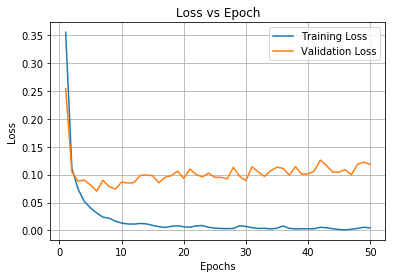

In [7]:
#Plot loss vs epoch
#FILL THIS IN
plt.plot(range(1,51),hist.history['loss'])
plt.plot(range(1,51),hist.history['val_loss'])
plt.title("Loss vs Epoch")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['Training Loss','Validation Loss'])
plt.grid(True)

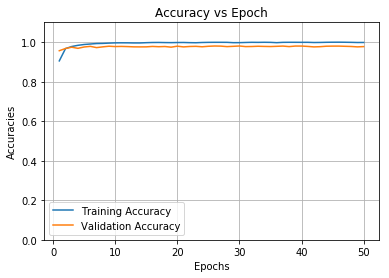

In [8]:
#Plot accuracy vs epoch
#FILL THIS IN
plt.plot(range(1,51),hist.history['acc'])
plt.plot(range(1,51),hist.history['val_acc'])
plt.title("Accuracy vs Epoch")
plt.xlabel("Epochs")
plt.ylim(0,1.1)
plt.ylabel("Accuracies")
plt.legend(['Training Accuracy','Validation Accuracy'])
plt.grid(True)

In [9]:
#Print accuracy of classifier on MNIST testing data
#FILL THIS IN
[test_loss,test_acc] = model.evaluate(data_test, labels_test, batch_size = 512)
print("Test Accuracy: {:0.2f}%".format(test_acc*100))

10000/10000 [==============================] - 0s 28us/step
Test Accuracy: 97.74%


In [19]:
# Edit the classifier name fed into KerasModel Wrapper with the name of the 
# classifier from above and then run this block

#Get TensorFlow Session to pass into Cleverhans modules
sess = backend.get_session()

#Create wrapper for classifier model so that it can be passed into Cleverhans modules
wrap = KerasModelWrapper(model)

# Part 2: The Fast Gradient Method (FGM)

In [23]:
#Implementing the FGSM attack

#FGM Instance on trained classifier from Part 1
#FILL THIS IN
fgm = FastGradientMethod(wrap, sess=sess)

#Attack parameters
#FILL THIS IN
fgm_params = { 'eps': 0.25, 'clip_min': 0.0, 'clip_max': 1.0}

#Generate adversarial data
#FILL THIS IN
backend.set_learning_phase(1)
fgm_data = fgm.generate_np(data_test, **fgm_params)

#Evaluate accuracy on target classifier 
#FILL THIS IN
backend.set_learning_phase(1)
[test_loss_fgm, test_acc_fgm] = model.evaluate(fgm_data, labels_test)
print("Test Accuracy: {:0.2f}%".format(test_acc_fgm*100))

InvalidArgumentError: You must feed a value for placeholder tensor 'batch_normalization_1/keras_learning_phase' with dtype bool
	 [[node batch_normalization_1/keras_learning_phase (defined at /home/aggarw82/.conda/envs/cent7/5.1.0-py27/custom_jupyter_27/lib/python2.7/site-packages/keras/backend/tensorflow_backend.py:120)  = Placeholder[dtype=DT_BOOL, shape=<unknown>, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]

Caused by op u'batch_normalization_1/keras_learning_phase', defined at:
  File "/home/aggarw82/.conda/envs/cent7/5.1.0-py27/custom_jupyter_27/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/home/aggarw82/.conda/envs/cent7/5.1.0-py27/custom_jupyter_27/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/aggarw82/.conda/envs/cent7/5.1.0-py27/custom_jupyter_27/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/aggarw82/.conda/envs/cent7/5.1.0-py27/custom_jupyter_27/lib/python2.7/site-packages/traitlets/config/application.py", line 664, in launch_instance
    app.start()
  File "/home/aggarw82/.conda/envs/cent7/5.1.0-py27/custom_jupyter_27/lib/python2.7/site-packages/ipykernel/kernelapp.py", line 499, in start
    self.io_loop.start()
  File "/home/aggarw82/.conda/envs/cent7/5.1.0-py27/custom_jupyter_27/lib/python2.7/site-packages/tornado/ioloop.py", line 1073, in start
    handler_func(fd_obj, events)
  File "/home/aggarw82/.conda/envs/cent7/5.1.0-py27/custom_jupyter_27/lib/python2.7/site-packages/tornado/stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/aggarw82/.conda/envs/cent7/5.1.0-py27/custom_jupyter_27/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 456, in _handle_events
    self._handle_recv()
  File "/home/aggarw82/.conda/envs/cent7/5.1.0-py27/custom_jupyter_27/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 486, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/aggarw82/.conda/envs/cent7/5.1.0-py27/custom_jupyter_27/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 438, in _run_callback
    callback(*args, **kwargs)
  File "/home/aggarw82/.conda/envs/cent7/5.1.0-py27/custom_jupyter_27/lib/python2.7/site-packages/tornado/stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/aggarw82/.conda/envs/cent7/5.1.0-py27/custom_jupyter_27/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/aggarw82/.conda/envs/cent7/5.1.0-py27/custom_jupyter_27/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/aggarw82/.conda/envs/cent7/5.1.0-py27/custom_jupyter_27/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/home/aggarw82/.conda/envs/cent7/5.1.0-py27/custom_jupyter_27/lib/python2.7/site-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/aggarw82/.conda/envs/cent7/5.1.0-py27/custom_jupyter_27/lib/python2.7/site-packages/ipykernel/zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/aggarw82/.conda/envs/cent7/5.1.0-py27/custom_jupyter_27/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2714, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/aggarw82/.conda/envs/cent7/5.1.0-py27/custom_jupyter_27/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2818, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/aggarw82/.conda/envs/cent7/5.1.0-py27/custom_jupyter_27/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2878, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-2-d9ec23ac466f>", line 21, in <module>
    model.add(BatchNormalization())
  File "/home/aggarw82/.conda/envs/cent7/5.1.0-py27/custom_jupyter_27/lib/python2.7/site-packages/keras/models.py", line 489, in add
    output_tensor = layer(self.outputs[0])
  File "/home/aggarw82/.conda/envs/cent7/5.1.0-py27/custom_jupyter_27/lib/python2.7/site-packages/keras/engine/topology.py", line 603, in __call__
    output = self.call(inputs, **kwargs)
  File "/home/aggarw82/.conda/envs/cent7/5.1.0-py27/custom_jupyter_27/lib/python2.7/site-packages/keras/layers/normalization.py", line 190, in call
    training=training)
  File "/home/aggarw82/.conda/envs/cent7/5.1.0-py27/custom_jupyter_27/lib/python2.7/site-packages/keras/backend/tensorflow_backend.py", line 2735, in in_train_phase
    training = learning_phase()
  File "/home/aggarw82/.conda/envs/cent7/5.1.0-py27/custom_jupyter_27/lib/python2.7/site-packages/keras/backend/tensorflow_backend.py", line 120, in learning_phase
    name='keras_learning_phase')
  File "/home/aggarw82/.conda/envs/cent7/5.1.0-py27/custom_jupyter_27/lib/python2.7/site-packages/tensorflow/python/ops/array_ops.py", line 1747, in placeholder
    return gen_array_ops.placeholder(dtype=dtype, shape=shape, name=name)
  File "/home/aggarw82/.conda/envs/cent7/5.1.0-py27/custom_jupyter_27/lib/python2.7/site-packages/tensorflow/python/ops/gen_array_ops.py", line 5206, in placeholder
    "Placeholder", dtype=dtype, shape=shape, name=name)
  File "/home/aggarw82/.conda/envs/cent7/5.1.0-py27/custom_jupyter_27/lib/python2.7/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/home/aggarw82/.conda/envs/cent7/5.1.0-py27/custom_jupyter_27/lib/python2.7/site-packages/tensorflow/python/util/deprecation.py", line 488, in new_func
    return func(*args, **kwargs)
  File "/home/aggarw82/.conda/envs/cent7/5.1.0-py27/custom_jupyter_27/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 3274, in create_op
    op_def=op_def)
  File "/home/aggarw82/.conda/envs/cent7/5.1.0-py27/custom_jupyter_27/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 1770, in __init__
    self._traceback = tf_stack.extract_stack()

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'batch_normalization_1/keras_learning_phase' with dtype bool
	 [[node batch_normalization_1/keras_learning_phase (defined at /home/aggarw82/.conda/envs/cent7/5.1.0-py27/custom_jupyter_27/lib/python2.7/site-packages/keras/backend/tensorflow_backend.py:120)  = Placeholder[dtype=DT_BOOL, shape=<unknown>, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]


In [ ]:
#Show ten original samples and their corresponding adversarial samples
#FILL THIS IN

In [ ]:
#Implementing Detection via Autoencoders

def autoencoder():
    ae = Sequential()
    ae.add(Dense(400, activation=None, kernel_initializer="normal", input_dim=784))
    ae.add(Dense(200, activation=None, kernel_initializer='normal'))
    ae.add(Dense(100, activation=None, kernel_initializer='normal'))
    ae.add(Dense(200, activation=None, kernel_initializer='normal'))
    ae.add(Dense(400, activation=None, kernel_initializer='normal'))
    ae.add(Dense(784, activation='sigmoid', kernel_initializer='normal'))
    return ae

#Create and train the autoencoder using the mean squared error loss and adam optimizer
#FILL THIS IN

In [ ]:
#Using the autoencoder for detection and to determine a threshold 

# Create adversarial examples using FGSM on training data
#FILL THIS IN

# Obtain reconstruction errors on training set and determine a threshold 
#FILL THIS IN

# Convert error tensor into NumPy array 
# CHANGE NAME 'error' TO WHAT YOU CALLED IT ABOVE
error = error.eval(session=sess)

# Determine threshold (based on min in this case) and print it 
#FILL THIS IN

# Calculate error of adversarial testing set
#FILL THIS IN

# Determine how many examples are above threshold and consider them adversarial
# (true positive count)
# Hint: Use a 'for' loop to compare each error value to the threshold
#FILL THIS IN

# Print number of true positive samples
#FILL THIS IN  

# Determine false positives on benign testing set
#FILL THIS IN 


# Determine how many examples are above threshold and consider them adversarial
# (false positive count)
# Hint: Use a 'for' loop to compare each error value to the threshold
#FILL THIS IN 
    
# Print number of false positive samples
#FILL THIS IN   

#Part 3: Projected Gradient Descent

In [ ]:
#Implementing the PGD attack

#PGD Instance on trained classifier from Part 1
pgd = MadryEtAl(wrap, sess=sess)

#Attack parameters
#FILL THIS IN

#Generate adversarial data
#FILL THIS IN

#Evaluate accuracy of perturbed data on target classifier
#FILL THIS IN

In [ ]:
#Show ten original samples and their corresponding adversarial samples
#FILL THIS IN 

In [ ]:
#Implementing the adversarial training defense
#FILL THIS IN

In [ ]:
#Using the defense to evaluate the accuracy of the perturbed data
#FILL THIS IN 

#Part 4: Carlini and Wagner Attack

In [ ]:
#Implementing the CW attack

#CW Instance on trained classifier from Part 1
#FILL THIS IN


#Attack parameters
#FILL THIS IN


#Generate adversarial data
#FILL THIS IN


#Evaluate accuracy of perturbed data on target classifier
#FILL THIS IN

In [ ]:
#Show ten original samples and their corresponding adversarial samples
#FILL THIS IN 

In [ ]:
#Implementing the dimensionality reduction (PCA) defense 

#Calculate PCA projection
pca = PCA(100)
pca.fit(data_train)
pca_train = pca.transform(data_train)
pca_test = pca.transform(data_test)

#Transform perturbed CW data using the subspace from the original training data
#FILL THIS IN 

# create model for PCA
def pca_model():
    model = Sequential()
    
    #FILL THIS IN 

    return model

#Create model graph, compile it, and train it using pca_train lables_train 
#FILL THIS IN 

In [ ]:
#Using the defense (and comparing to baseline accuracy)
#FILL THIS IN 

#Part 5: DeepFool 

In [ ]:
#Implementing the DeepFool attack

#DeepFool Instance on trained classifier from Part 1
#FILL THIS IN


#Attack parameters
#FILL THIS IN


#Generate adversarial data
#FILL THIS IN


#Evaluate accuracy of perturbed data on target classifier
#FILL THIS IN

In [ ]:
#Show ten original samples and their corresponding adversarial samples
#FILL THIS IN

In [ ]:
#Implementing the Denoising Autoencoder Defense

def autoencoder():
    ae = Sequential()
    ae.add(Dense(400, activation=None, kernel_initializer="normal", input_dim=784))
    ae.add(Dense(200, activation=None, kernel_initializer='normal'))
    ae.add(Dense(100, activation=None, kernel_initializer='normal'))
    ae.add(Dense(200, activation=None, kernel_initializer='normal'))
    ae.add(Dense(400, activation=None, kernel_initializer='normal'))
    ae.add(Dense(784, activation='sigmoid', kernel_initializer='normal'))
    return ae

#Create training data for DAE 
df_attack_data_train = deepfool.generate_np(data_train, **fgm_params)
data_total_train = np.concatenate([df_attack_data_train, data_train])

#Create and train DAE graph
#FILL THIS IN

In [ ]:
#Using the defense

#Use DAE to to remove adversarial perturbation 
#FILL THIS IN

#Evaluate accuracy of FGM samples after denoising 
#FILL THIS IN

In [ ]:
#Show ten samples of adversarial samples after denoising
#FILL THIS IN